In [95]:
import pandas as pd
import numpy as np

In [96]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [97]:
data = np.array(raw_data)

In [98]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [99]:
no_train = int(0.8*no_of_examples)
no_train

17290

In [100]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1]

In [101]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [102]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [103]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W) + self.b
    
    def train_IRLS(self):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        self.W -= grad*self.N/(2*np.sum(self.X**2))
        self.b -= 2*np.sum(err)/self.N
        #self.W -= np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T.dot(self.W) - self.X.T.dot(self.y))
        
        return loss
        
        
        
        

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
SGD_plot = []
for i in range(no_of_epochs):
    loss = model.train(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    SGD_plot.append(test_loss)

644598.389407
598673.092537
562292.05492
533480.812983
510648.759728
492526.9452
478111.590443
466613.858401
457416.494725
450037.516934
444100.612231
439311.52495
435439.529689
432303.061724
429758.6525
427692.441367
426013.668964
424649.682544
423542.090085
422643.786455
421916.642479
421329.699567
420857.75165
420480.225395
420180.291471
419944.155859
419760.492263
419619.985755
419514.964534
419439.101861
419387.174099
419354.863819
419338.599198
419335.422766
419342.883947
419358.950917
419381.938212
419410.447181
419443.316939
419479.583919
419518.448479
419559.24729
419601.430496
419644.542783
419688.207679
419732.114524
419776.007633
419819.677279
419862.952187
419905.693267
419947.788389
419989.148006
420029.701504
420069.394135
420108.184445
420146.042123
420182.946179
420218.883426
420253.847187
420287.836217
420320.853781
420352.906886
420384.005623
420414.162614
420443.392545
420471.711761
420499.137938
420525.689788
420551.386824
420576.249146
420600.297272
420623.551988


In [106]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
IRLS_plot = []
for i in range(no_of_epochs):
    loss = model.train_IRLS()
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    IRLS_plot.append(test_loss)

4323
[[ 0.31131453]
 [ 0.13315712]
 [ 0.5422476 ]
 [ 0.51666013]]
4323
[[ 0.23843215]
 [ 0.07502995]
 [ 0.40558999]
 [ 0.42360303]]
4323
[[ 0.18760796]
 [ 0.05070126]
 [ 0.31877328]
 [ 0.38063473]]
4323
[[ 0.15144878]
 [ 0.04268613]
 [ 0.26091597]
 [ 0.36397295]]
4323
[[ 0.12528693]
 [ 0.0419975 ]
 [ 0.22040347]
 [ 0.36087204]]
4323
[[ 0.10609293]
 [ 0.04413304]
 [ 0.19067967]
 [ 0.3645251 ]]
4323
[[ 0.09184756]
 [ 0.04693281]
 [ 0.16796749]
 [ 0.3713184 ]]
4323
[[ 0.08117176]
 [ 0.04944079]
 [ 0.1500309 ]
 [ 0.37935295]]
4323
[[ 0.07310338]
 [ 0.05130383]
 [ 0.13549997]
 [ 0.38764866]]
4323
[[ 0.06695901]
 [ 0.05245762]
 [ 0.12350057]
 [ 0.39571618]]
4323
[[ 0.0622461 ]
 [ 0.05296516]
 [ 0.11344965]
 [ 0.40332665]]
4323
[[ 0.05860549]
 [ 0.05293584]
 [ 0.10494046]
 [ 0.41038817]]
4323
[[ 0.05577289]
 [ 0.05248658]
 [ 0.09767725]
 [ 0.41687956]]
4323
[[ 0.05355242]
 [ 0.05172471]
 [ 0.09143716]
 [ 0.42281504]]
4323
[[ 0.05179802]
 [ 0.05074169]
 [ 0.0860473 ]
 [ 0.4282254 ]]
4323
[[ 0.

4323
[[ 0.04288986]
 [ 0.02805825]
 [ 0.04468031]
 [ 0.48165848]]
4323
[[ 0.04288985]
 [ 0.02805819]
 [ 0.04468025]
 [ 0.48165858]]
4323
[[ 0.04288984]
 [ 0.02805813]
 [ 0.04468019]
 [ 0.48165868]]
4323
[[ 0.04288984]
 [ 0.02805808]
 [ 0.04468013]
 [ 0.48165876]]
4323
[[ 0.04288983]
 [ 0.02805804]
 [ 0.04468009]
 [ 0.48165884]]
4323
[[ 0.04288982]
 [ 0.028058  ]
 [ 0.04468004]
 [ 0.48165891]]
4323
[[ 0.04288981]
 [ 0.02805796]
 [ 0.04468   ]
 [ 0.48165898]]
4323
[[ 0.04288981]
 [ 0.02805792]
 [ 0.04467997]
 [ 0.48165904]]
4323
[[ 0.0428898 ]
 [ 0.02805789]
 [ 0.04467993]
 [ 0.48165909]]
4323
[[ 0.0428898 ]
 [ 0.02805786]
 [ 0.0446799 ]
 [ 0.48165914]]
4323
[[ 0.04288979]
 [ 0.02805784]
 [ 0.04467988]
 [ 0.48165918]]
4323
[[ 0.04288979]
 [ 0.02805781]
 [ 0.04467985]
 [ 0.48165922]]
4323
[[ 0.04288979]
 [ 0.02805779]
 [ 0.04467983]
 [ 0.48165926]]
4323
[[ 0.04288978]
 [ 0.02805777]
 [ 0.04467981]
 [ 0.48165929]]
4323
[[ 0.04288978]
 [ 0.02805776]
 [ 0.04467979]
 [ 0.48165932]]
4323
[[ 0.

4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.04288975]
 [ 0.02805758]
 [ 0.04467961]
 [ 0.48165961]]
4323
[[ 0.

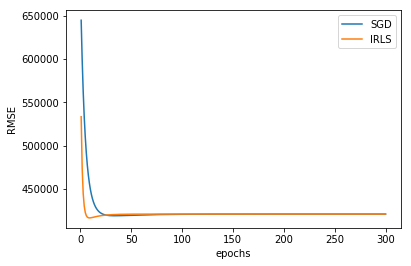

In [107]:
SGD_, = plt.plot(1+np.array(range(no_of_epochs)),SGD_plot)
IRLS_, = plt.plot(1+np.array(range(no_of_epochs)),IRLS_plot)
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.legend([SGD_, IRLS_],["SGD","IRLS"])